# Capstone 3: Sustainable Energy Recommendation System  
### "Leveraging Neural Collaborative Filtering for Sustainable Energy Insights"
## Exploratory Data Analysis Objectives: 
### 1. Understand Data Distribution  
- Examine statistical summaries of key features.  
- Identify skewness and distribution patterns in numerical data.  
- Visualize density plots and histograms for energy-related variables.  

### 2. Identify Relationships and Trends  
- Analyze correlations between **electricity access, CO₂ emissions, and GDP per capita**.  
- Explore temporal trends for **energy consumption, renewable adoption, and financial flows**.  
- Investigate dependencies between **energy sources (fossil, nuclear, renewables)**.   

### 3. Geospatial Analysis  
- Map energy usage across different regions using **latitude and longitude**.  
- Cluster countries based on **energy accessibility and consumption patterns**.  
- Identify geographical dependencies influencing renewable adoption rates.  

### 4. Outlier Detection & Anomaly Investigation  
- Detect extreme values in **CO₂ emissions, financial flows, and primary energy consumption**.  
- Investigate whether anomalies are reporting errors or meaningful insights.  
- Decide on handling strategies (removal, transformation, separate modeling).  

## Data Overview:
- **Entity**: The name of the country or region for which the data is reported.
- **Year**: The year for which the data is reported, ranging from 2000 to 2020.
- **Access to electricity (% of population)**: The percentage of population with access to electricity.
- **Access to clean fuels for cooking (% of population)**: The percentage of the population with primary reliance on clean fuels.
- **Renewable-electricity-generating-capacity-per-capita**: Installed renewable energy capacity per person.
- **Financial flows to developing countries (US $)**: Aid and assistance from developed countries for clean energy projects.
  
- **Renewable energy share in total final energy consumption (%)**: Percentage of renewable energy in final energy consumption.
- **Electricity from fossil fuels (TWh)**: Electricity generated from fossil fuels (coal, oil, gas) in terawatt-hours.
- **Electricity from nuclear (TWh)**: Electricity generated from nuclear power in terawatt-hours.
- **Electricity from renewables (TWh)**: Electricity generated from renewable sources (hydro, solar, wind, etc.) in terawatt-hours.
- **Low-carbon electricity (% electricity)**: Percentage of electricity from low-carbon sources (nuclear and renewables).
- **Primary energy consumption per capita (kWh/person)**: Energy consumption per person in kilowatt-hours.
- **Energy intensity level of primary energy (MJ/$2011 PPP GDP)**: Energy use per unit of GDP at purchasing power parity.
- **Value_co2_emissions (metric tons per capita)**: Carbon dioxide emissions per person in metric tons.
- **Renewables (% equivalent primary energy)**: Equivalent primary energy that is derived from renewable sources.
- **GDP growth (annual %)**: Annual GDP growth rate based on constant local currency.
- **GDP per capita**: Gross domestic product per person.
- **Density (P/Km²)**: Population density in persons per square kilometer.
- **Land Area (Km²)**: Total land area in square kilometers.
- **Latitude**: Latitude of the country's centroid in decimal degrees.
- **Longitude**: Longitude of the country's centroid in decimal degrees.

Features created in Data Wrangling: 
- **Renewables to Fossil Ratio**: Ratio of renewable electricity to fossil electricty
- **Energy Effciency**:
- **Renewable Nuclear Interaction**:
- **Energy Clusters**:
- **Energy Dependency**:
- **CO2 Intensity per Capita**: 

In [144]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [146]:
os.chdir('C:/Users/aamal/Desktop/Springboard/Springboard_DataScience/Capstone-3-Energy/data')
file_path = 'C:/Users/aamal/Desktop/Springboard/Springboard_DataScience/Capstone-3-Energy/data/energy_data_cleaned.csv'
df = pd.read_csv(file_path)

In [148]:
df.head()

,Entity,Year,Electricity_Access,Clean_Cooking_Fuels,Renewable_Capacity,Financial_Flows,Renewable_Share,Fossil_Electricity,Nuclear_Electricity,Renewable_Electricity,...,Population_Density,Land_Area,Latitude,Longitude,Energy_Dependency,CO2_Intensity_Per_Capita,Renewables_to_Fossil,Energy_Efficiency,Renewable_Nuclear_Interaction,Energy_Cluster
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,0.468451,0.16,0.0,0.31,...,60.0,652230.0,33.93911,67.709953,9.369013e+03,0.000005,1.937488,2.300408,0.0,2
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,0.474802,0.09,0.0,0.50,...,60.0,652230.0,33.93911,67.709953,6.172428e+04,0.000005,5.555494,2.938436,0.0,2
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,0.393898,0.13,0.0,0.56,...,60.0,652230.0,33.93911,67.709953,1.555899e+06,0.000007,4.307659,0.681160,0.0,2
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,0.381716,0.31,0.0,0.63,...,60.0,652230.0,33.93911,67.709953,9.913163e+06,0.000008,2.032252,0.728731,0.0,2
4,Afghanistan,2004,20.064968,10.9,7.75,0.0,0.460641,0.33,0.0,0.56,...,60.0,652230.0,33.93911,67.709953,0.000000e+00,0.000007,1.696965,1.036219,0.0,2


In [150]:
df.shape

(3363, 27)

In [152]:
df.describe()

,Year,Electricity_Access,Clean_Cooking_Fuels,Renewable_Capacity,Financial_Flows,Renewable_Share,Fossil_Electricity,Nuclear_Electricity,Renewable_Electricity,Low_Carbon_Electricity,...,Population_Density,Land_Area,Latitude,Longitude,Energy_Dependency,CO2_Intensity_Per_Capita,Renewables_to_Fossil,Energy_Efficiency,Renewable_Nuclear_Interaction,Energy_Cluster
count,3363.000000,3363.000000,3363.000000,3363.000000,3.363000e+03,3363.000000,3363.000000,3363.000000,3363.000000,3363.000000,...,3363.000000,3.363000e+03,3363.000000,3363.000000,3.363000e+03,3363.000000,3.363000e+03,3363.000000,3363.000000,3363.000000
mean,2010.052632,78.038951,63.010690,82.089813,4.212583e+07,0.344130,38.620358,8.184448,16.259396,36.726140,...,226.573595,5.536645e+05,17.395436,13.318431,1.868008e+07,0.001176,3.378482e+05,inf,792.199051,2.119536
std,6.054769,30.487737,38.669897,217.522500,2.069441e+08,0.302431,104.505290,40.383930,50.974353,33.805402,...,706.775133,1.292113e+06,24.143428,65.794382,1.321540e+08,0.006084,3.545374e+06,NaN,4423.164734,1.632867
min,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.100000e+01,-40.900557,-175.198242,0.000000e+00,0.000000,0.000000e+00,0.006015,0.000000,0.000000
25%,2005.000000,56.564420,23.600000,0.000000,0.000000e+00,0.082726,0.280000,0.000000,0.055000,3.451780,...,31.000000,2.775000e+04,1.650801,-14.452362,0.000000e+00,0.000006,3.024881e-02,0.592981,0.000000,1.000000
50%,2010.000000,97.500000,83.150000,9.240000,0.000000e+00,0.242607,3.020000,0.000000,1.490000,28.828829,...,87.000000,1.184840e+05,15.783471,18.732207,0.000000e+00,0.000060,2.748091e-01,0.977274,0.000000,2.000000
75%,2015.000000,100.000000,100.000000,67.210000,2.880000e+06,0.555966,28.845000,0.000000,9.420000,63.441536,...,214.000000,5.279680e+05,38.861034,45.038189,6.585126e+05,0.000307,1.526643e+00,1.462847,0.000000,4.000000
max,2020.000000,100.000000,100.000000,3060.190000,5.202310e+09,1.000000,1276.320000,451.530000,520.010000,100.000010,...,8358.000000,9.984670e+06,64.963051,178.065032,4.459123e+09,0.059053,6.330000e+07,inf,46918.242800,4.000000


## Objective 1: Understand Data Distribution

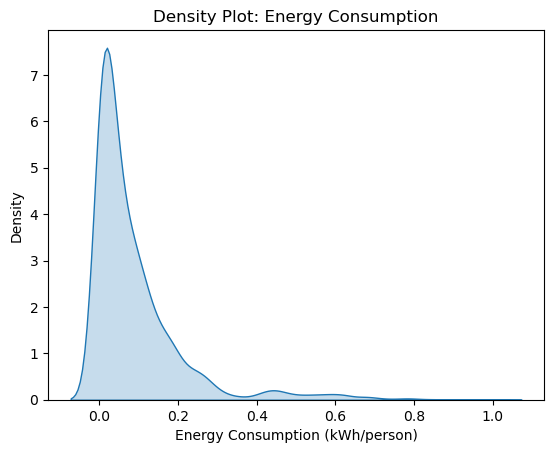

In [168]:
#Energy consumption per person
sns.kdeplot(df['Energy_Consumption'], fill=True)
plt.title('Density Plot: Energy Consumption')
plt.xlabel('Energy Consumption (kWh/person)')
plt.ylabel('Density')
plt.show()

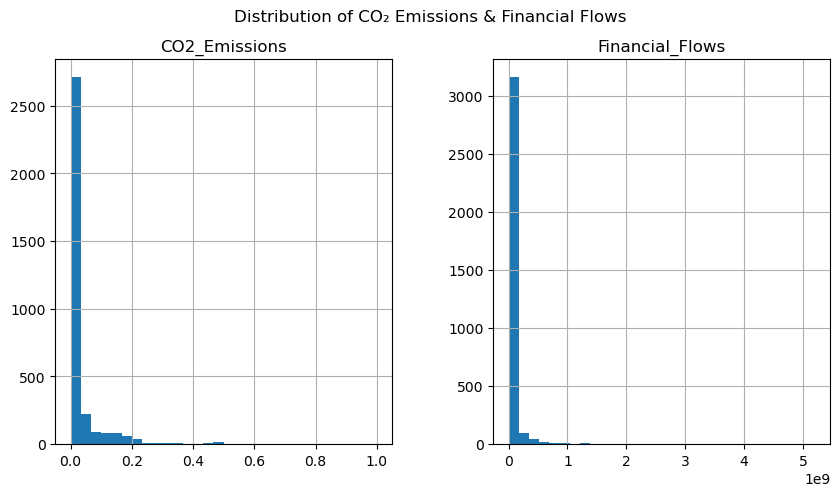

In [170]:
#CO2 emissions per person and aid amount to developing countries (US$) 
df[['CO2_Emissions', 'Financial_Flows']].hist(bins=30, figsize=(10,5))
plt.suptitle("Distribution of CO₂ Emissions & Financial Flows")
plt.show()

In [217]:
print(df.isin([np.inf]).sum())  # Count of infinite values

Entity                            0
Year                              0
Electricity_Access                0
Clean_Cooking_Fuels               0
Renewable_Capacity                0
Financial_Flows                   0
Renewable_Share                   0
Fossil_Electricity                0
Nuclear_Electricity               0
Renewable_Electricity             0
Low_Carbon_Electricity            0
Energy_Consumption                0
Energy_Intensity                  0
CO2_Emissions                     0
Renewables_Percentage             0
GDP_Growth                        0
GDP_Per_Capita                    0
Population_Density                0
Land_Area                         0
Latitude                          0
Longitude                         0
Energy_Dependency                 0
CO2_Intensity_Per_Capita          0
Renewables_to_Fossil              0
Energy_Efficiency                21
Renewable_Nuclear_Interaction     0
Energy_Cluster                    0
Renewable_Adoption_Group    

In [221]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)  # Convert inf to NaN
df.fillna(df['Energy_Efficiency'].mean(), inplace=True)  

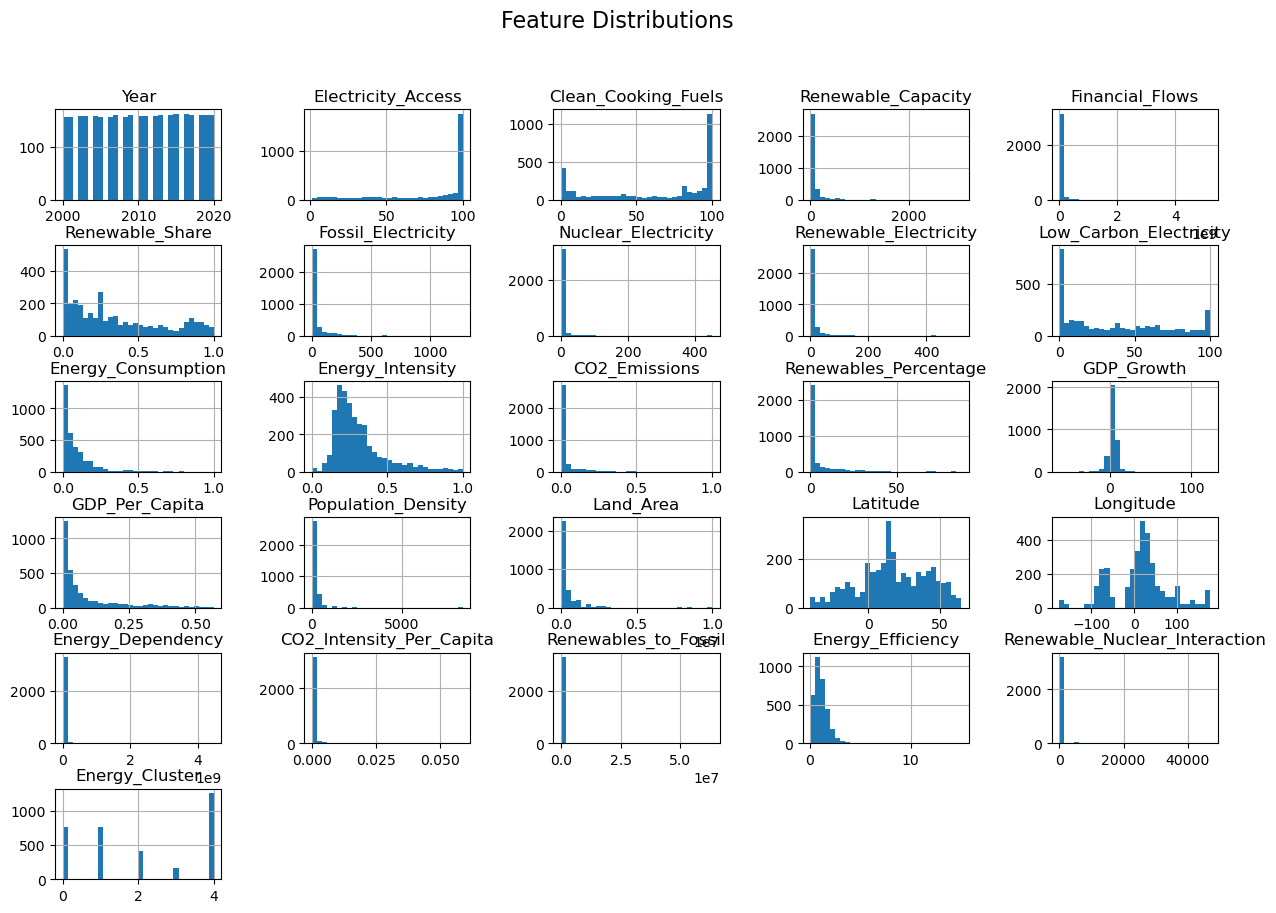

In [223]:
#Distribution Analysis

df.hist(figsize=(15, 10), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.subplots_adjust(hspace=0.5, wspace=0.5) 
plt.show()

Insight on distribution: Many features are skewed left or right depending on the feature. We have to keep in mind the data type such as percentage and the context of each feature such as there are many zeros in the data that correctly represent some of the energy preferences. 

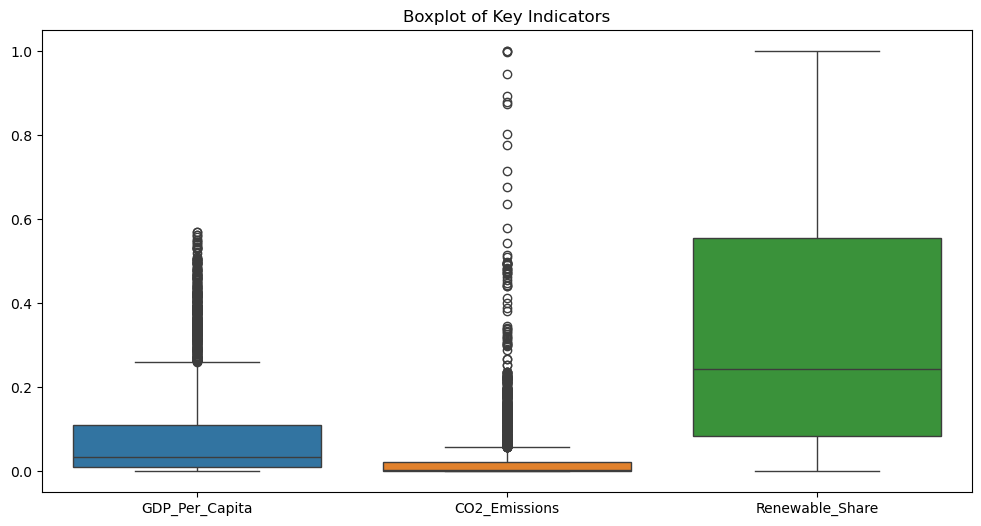

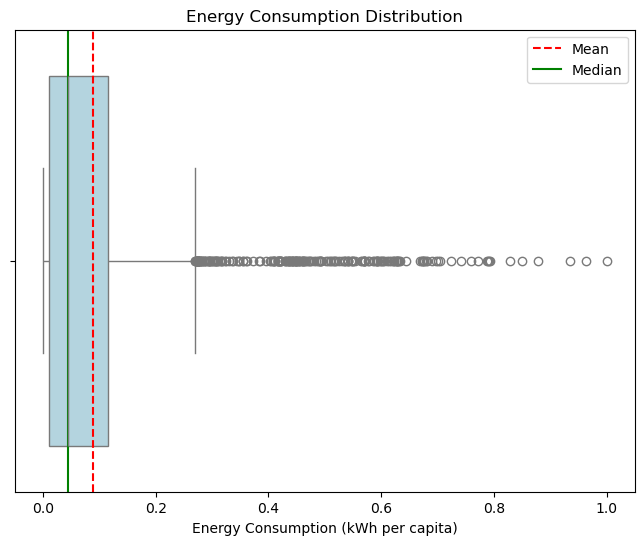

In [226]:
mean_value = df['Energy_Consumption'].mean()
median_value = df['Energy_Consumption'].median()

plt.figure(figsize=(8, 6))


sns.boxplot(x=df['Energy_Consumption'], color="lightblue")


plt.axvline(mean_value, color='red', linestyle='--', label="Mean")
plt.axvline(median_value, color='green', linestyle='-', label="Median")


plt.legend()

plt.title("Energy Consumption Distribution")
plt.xlabel("Energy Consumption (kWh per capita)")

plt.show()

## Objective 2 : Identify Relationships & Trend

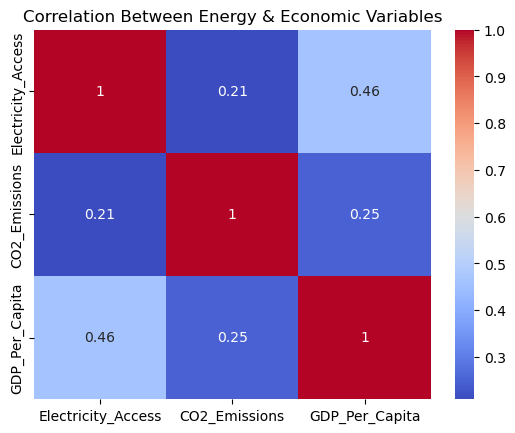

In [173]:
sns.heatmap(df[['Electricity_Access', 'CO2_Emissions', 'GDP_Per_Capita']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Energy & Economic Variables")
plt.show()

## 2. Investiage Energy Dependency

#### 2.1   Fossil vs Renewable Energy Dependence


In [ ]:
#Interactive Fossil Fuel Dependency Over Time
fig = px.line(df[df["Entity"].isin(["Japan", "United States", "Saudi Arabia", "Australia", "Germany"])],
              x="Year", y="Fossil_Electricity", color="Entity",
              title="Fossil Fuel Dependency Over Time",
              labels={"Fossil_Electricity": "Fossil Fuel Electricity (%)"},
              template="plotly_white")
fig.update_layout(width=1000, height=700)
fig.show()

In [ ]:
fig = px.line(df[df["Entity"].isin(["Japan", "United States", "Saudi Arabia", "Australia", "Germany"])],
              x="Year", y="Renewable_Electricity", color="Entity",
              title="Fossil Fuel Dependency Over Time",
              labels={"Fossil_Electricity": "Fossil Fuel Electricity (%)"},
              template="plotly_white")
fig.update_layout(width=1000, height=700)
fig.show()

sns.scatterplot(data=df, x='Fossil_Electricity', y='Renewable_Electricity', hue='Entity')
plt.title("Fossil vs Renewable Electricity Production")
plt.xlabel("Fossil-Based Electricity (TWh)")
plt.ylabel("Renewable-Based Electricity (TWh)")
plt.show()

#### 2.2 Fossil vs Renewable Electricity

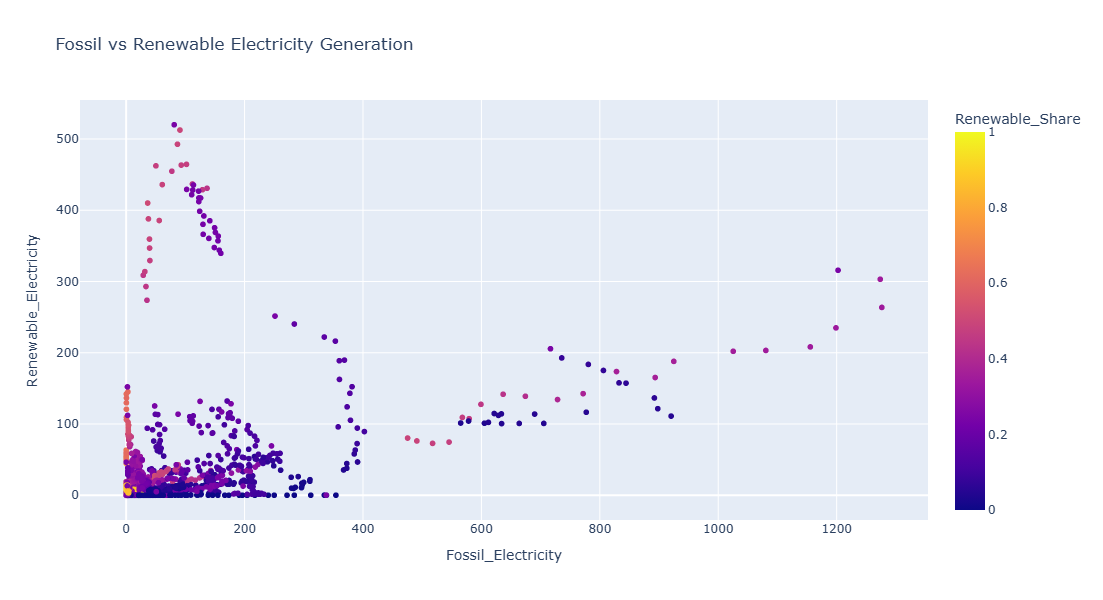

In [276]:
#Scatter Plot: Fossil vs Renewable Electricity

fig = px.scatter(df, x="Fossil_Electricity", y="Renewable_Electricity", 
                 hover_name="Entity", color="Renewable_Share",
                 title="Fossil vs Renewable Electricity Generation")
fig.update_layout(width=1000, height=600)
fig.show()

#### 2.3 Renewable Share

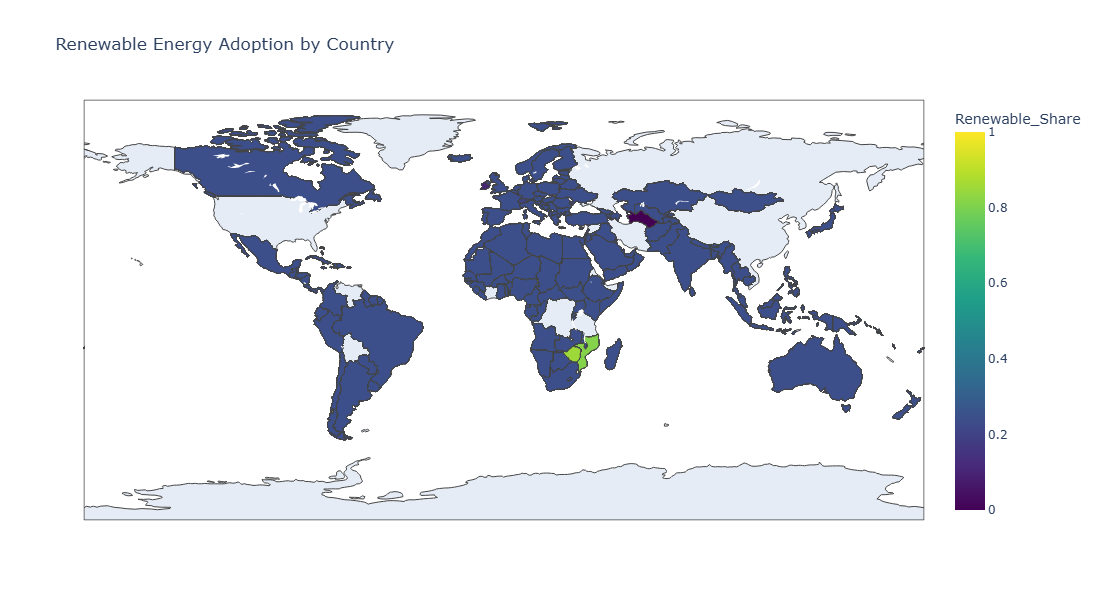

In [274]:
fig = px.choropleth(df, 
                    locations="Entity",
                    locationmode="country names",
                    color="Renewable_Share",
                    title="Renewable Energy Adoption by Country",
                    color_continuous_scale="Viridis")
fig.update_layout(width=1000, height=600)
fig.show()

## 3. Policy & Investment Influence on Energy 

In [278]:
# Policy & Investment Influence on Energy
#Step 5: Identify Policy-Driven Energy Growth
df['Investment_Energy_Ratio'] = df['Financial_Flows'] / (df['Energy_Consumption'] + 1e-6)
df['Policy_Impact'] = df['Investment_Energy_Ratio'].apply(lambda x: "Strong Investment" if x > 0.05 else "Low Investment")

- Investment-Energy Ratio Calculation `Investment_Energy_Ratio`: 
    Higher financial investments relative to energy consumption indicates stronger policy-driven efforts
    
- Categoriation into Policy Impact Groups `Policy_Impact`:
    Helps identify nations that actively invest in sustainable energy versus those with limited financial support. 

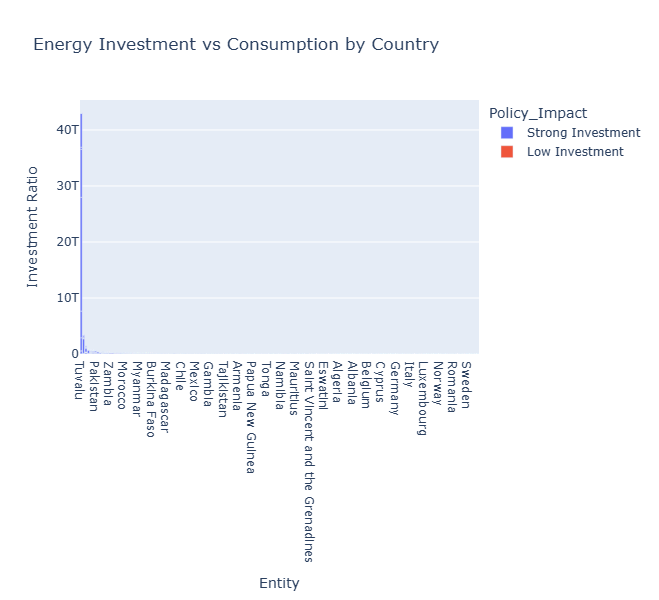

In [282]:
#Investment vs Energy Consumption
fig = px.bar(df, x="Entity", y="Investment_Energy_Ratio", 
             color="Policy_Impact",
             title="Energy Investment vs Consumption by Country",
             labels={"Investment_Energy_Ratio": "Investment Ratio"},
             hover_data=["Energy_Consumption"])

fig.update_layout(xaxis={'categoryorder':'total descending'})  # Sort by investment levels
fig.update_layout(width=1000, height=600)
fig.show()


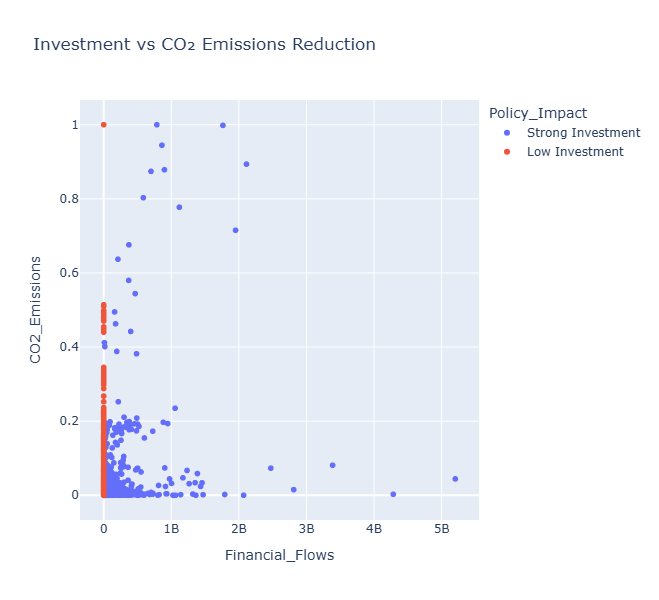

In [286]:
#Policy Investment & CO2 Reductions
fig = px.scatter(df, x="Financial_Flows", y="CO2_Emissions",
                 hover_name="Entity", color="Policy_Impact",
                 title="Investment vs CO₂ Emissions Reduction")
fig.update_layout(width=1000, height=600)
fig.show()

## 4. Examine Economic & CO2 Emission Relationships

In [292]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4" 

In [298]:
# Economic & Energy Efficiency Groups
# Define Clustering Based on GDP & Energy Efficienc
from sklearn.cluster import KMeans

features = df[['GDP_Per_Capita', 'Energy_Consumption', 'CO2_Emissions']]
kmeans = KMeans(n_clusters=3, random_state=42)
df['Econ_Energy_Cluster'] = kmeans.fit_predict(features)

Key Insights from This Approach
✔ High GDP, Low Energy Consumption: Likely highly efficient economies with strong energy policies.
✔ Low GDP, High Energy Consumption: May indicate energy-intensive economies or nations struggling with efficiency.
✔ Middle Cluster: Countries transitioning in their economic growth and energy use.


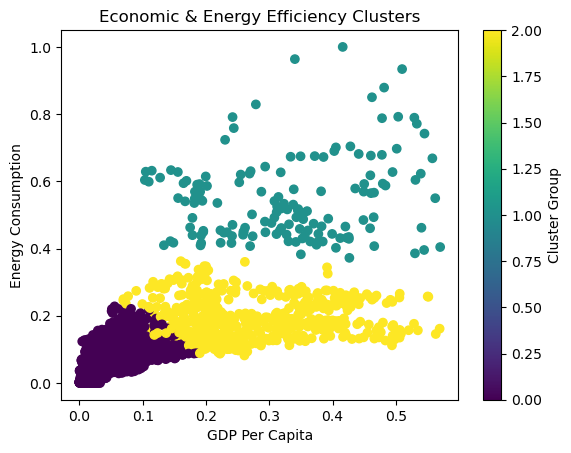

In [300]:

plt.scatter(df['GDP_Per_Capita'], df['Energy_Consumption'], c=df['Econ_Energy_Cluster'], cmap='viridis')
plt.xlabel("GDP Per Capita")
plt.ylabel("Energy Consumption")
plt.title("Economic & Energy Efficiency Clusters")
plt.colorbar(label="Cluster Group")
plt.show()

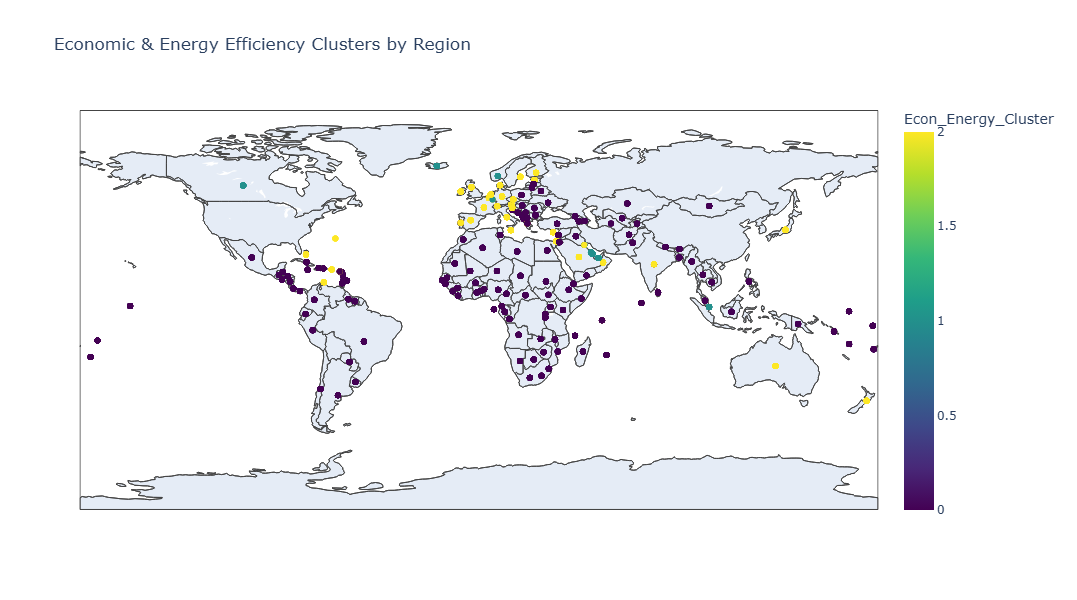

In [302]:
fig = px.scatter_geo(df, 
                     lat="Latitude", lon="Longitude", 
                     color="Econ_Energy_Cluster",
                     hover_name="Entity",
                     title="Economic & Energy Efficiency Clusters by Region",
                     color_continuous_scale="Viridis")

fig.update_layout(
    geo=dict(showcountries=True),
    width=1000, height=600  # Adjust map size for better visibility
)

fig.show()

In [ ]:
#GDP vs Energy Consumption vs Emissions
sns.scatterplot(data=df, x='GDP_Per_Capita', y='CO2_Emissions', hue='Renewable_Share')
plt.title("GDP vs CO₂ Emissions (Colored by Renewable Share)")
plt.xlabel("GDP per Capita")
plt.ylabel("CO₂ Emissions (tons)")
plt.show()

In [ ]:
#Interactive 

fig = px.scatter(df[df["Entity"].isin(["Japan", "South Korea", "France", "Canada", "South Africa"])],
                 x="GDP_Per_Capita", y="Energy_Consumption", color="Entity",
                 title="GDP vs. Energy Consumption Trends",
                 hover_data=["Year"],
                 labels={"GDP_Per_Capita": "GDP Per Capita", "Energy_Consumption": "Energy Consumption"},
                 template="ggplot2")
fig.update_layout(width=1000, height=700)
fig.show()

### Objective 3:  Geospatial Analysis 

## 1.1 Geospatial Clustering: Energy Consumption & Renewable

In [ ]:
fig = px.scatter_geo(df, 
                     lat="Latitude", lon="Longitude", 
                     size="Energy_Consumption", 
                     color="Renewable_Share", 
                     hover_name="Entity",
                     title="Energy Accessibility & Renewable Adoption")

fig.update_layout(width=1000, height=600)
fig.show()

In [ ]:
#  Geographic & Climate-Based Clusters
✔ Groups regions with similar energy dynamics.
✔ Ideal for mapping energy accessibility trends.
#geo_features

In [ ]:
fig = px.scatter_geo(df, 
                     lat="Latitude", lon="Longitude", 
                     color="Energy_Cluster",
                     hover_name="Entity",
                     title="Energy Consumption Clusters by Region",
                     color_continuous_scale="Viridis")

fig.update_layout(
    geo=dict(showcountries=True),
    clickmode="event+select"
)
fig.update_layout(width=1000, height=600)  # Set width and height
fig.show()

In [ ]:
df.groupby('Energy_Cluster')[['Energy_Consumption', 'Renewable_Share']].mean()

### Understanding the Energy Clusters

| **Energy Cluster** | **Energy Consumption (avg)** | **Renewable Share (avg)** | **Interpretation** |
|--------------------|----------------------------|--------------------------|---------------------|
| **Cluster 0** | Low Consumption (~0.068) | Moderate Renewables (~26%) | Developing regions with improving energy access. |
| **Cluster 1** | Higher Consumption (~0.095) | High Renewables (~52%) | Clean energy leaders with strong renewable adoption. |
| **Cluster 2** | Moderate Consumption (~0.074) | Renewables (~35%) | Countries transitioning to renewable energy. |
| **Cluster 3** | Moderate Consumption (~0.078) | Lower Renewables (~29%) | Fossil-heavy regions with slow renewable adoption. |
| **Cluster 4** | High Consumption (~0.103) | Low Renewables (~28%) | Industrialized economies still reliant on fossil fuels. |

### Objective 4: Outlier Detection & Anomaly Investigation 

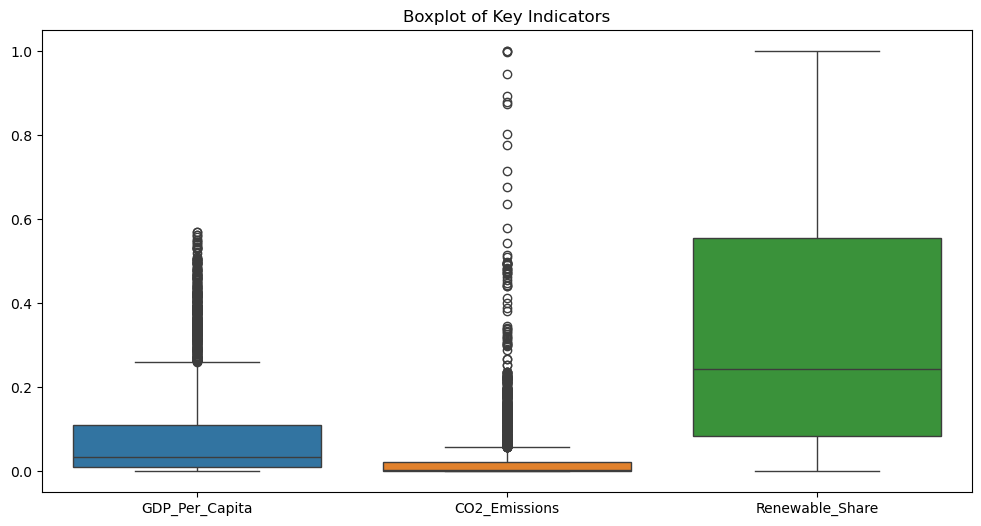

In [306]:
#Outlier Detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[["GDP_Per_Capita", "CO2_Emissions", "Renewable_Share"]])
plt.title("Boxplot of Key Indicators")
plt.show()

In [308]:
entity_mapping = dict(zip(df["Entity"].astype("category").cat.categories, range(len(df["Entity"].astype("category").cat.categories))))
print(entity_mapping)

{'Afghanistan': 0, 'Albania': 1, 'Algeria': 2, 'Angola': 3, 'Antigua and Barbuda': 4, 'Argentina': 5, 'Armenia': 6, 'Aruba': 7, 'Australia': 8, 'Austria': 9, 'Azerbaijan': 10, 'Bahamas': 11, 'Bahrain': 12, 'Bangladesh': 13, 'Barbados': 14, 'Belarus': 15, 'Belgium': 16, 'Belize': 17, 'Benin': 18, 'Bermuda': 19, 'Bhutan': 20, 'Bosnia and Herzegovina': 21, 'Botswana': 22, 'Brazil': 23, 'Bulgaria': 24, 'Burkina Faso': 25, 'Burundi': 26, 'Cambodia': 27, 'Cameroon': 28, 'Canada': 29, 'Central African Republic': 30, 'Chad': 31, 'Chile': 32, 'Colombia': 33, 'Comoros': 34, 'Congo': 35, 'Costa Rica': 36, 'Croatia': 37, 'Cuba': 38, 'Cyprus': 39, 'Czechia': 40, 'Denmark': 41, 'Djibouti': 42, 'Dominica': 43, 'Dominican Republic': 44, 'Ecuador': 45, 'Egypt': 46, 'El Salvador': 47, 'Equatorial Guinea': 48, 'Estonia': 49, 'Eswatini': 50, 'Ethiopia': 51, 'Fiji': 52, 'Finland': 53, 'France': 54, 'Gabon': 55, 'Gambia': 56, 'Georgia': 57, 'Germany': 58, 'Ghana': 59, 'Greece': 60, 'Grenada': 61, 'Guatemala

In [310]:
df["Entity"] = df["Entity"].astype("category").cat.codes

In [314]:
df.dtypes

Entity                             int16
Year                               int64
Electricity_Access               float64
Clean_Cooking_Fuels              float64
Renewable_Capacity               float64
Financial_Flows                  float64
Renewable_Share                  float64
Fossil_Electricity               float64
Nuclear_Electricity              float64
Renewable_Electricity            float64
Low_Carbon_Electricity           float64
Energy_Consumption               float64
Energy_Intensity                 float64
CO2_Emissions                    float64
Renewables_Percentage            float64
GDP_Growth                       float64
GDP_Per_Capita                   float64
Population_Density               float64
Land_Area                        float64
Latitude                         float64
Longitude                        float64
Energy_Dependency                float64
CO2_Intensity_Per_Capita         float64
Renewables_to_Fossil             float64
Energy_Efficienc

In [312]:
#Correlation Analysis
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

ValueError: could not convert string to float: 'Low Renewable Adoption'

<Figure size 2000x1000 with 0 Axes>